In [1]:
import pandas as pd
## configure pandas to display 3 digits after the .
pd.set_option('display.float_format', lambda x: '%.3f' % x)
## set the max number of rows to display without using the ....
pd.set_option('display.max_rows', 300)


import numpy as np

In [2]:
country_info = pd.read_csv('/Users/csstnns/Desktop/Python Data Course - Oct2020/Day 2/country_info.csv')

In [4]:
country_info

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.101,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981,AFG,4
...,...,...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157,ZWE,716
1700,Zimbabwe,Africa,1992,60.377,10704340,693.421,ZWE,716
1701,Zimbabwe,Africa,1997,46.809,11404948,792.450,ZWE,716
1702,Zimbabwe,Africa,2002,39.989,11926563,672.039,ZWE,716


In [6]:
grouped_data = country_info.groupby('continent')

In [11]:
for group in grouped_data:
    ## group is a tuple (group_name, data_frame)
    data = group[1]## take the dataframe
    ## apply pivoting
    my_pivot_table = pd.pivot_table(data, index=['country'], 
               values=['lifeExp','pop','gdpPercap'],
                                aggfunc=[np.std,np.median,'mean'])
    

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [13]:
group_dict = {}
unique_continents = country_info['continent'].unique()
for c in unique_continents:
    group = country_info[country_info['continent'] == c]
    group_dict[c] = group

In [14]:
group_dict

{'Asia':           country continent  year  lifeExp       pop  gdpPercap iso_alpha  \
 0     Afghanistan      Asia  1952   28.801   8425333    779.445       AFG   
 1     Afghanistan      Asia  1957   30.332   9240934    820.853       AFG   
 2     Afghanistan      Asia  1962   31.997  10267083    853.101       AFG   
 3     Afghanistan      Asia  1967   34.020  11537966    836.197       AFG   
 4     Afghanistan      Asia  1972   36.088  13079460    739.981       AFG   
 ...           ...       ...   ...      ...       ...        ...       ...   
 1675  Yemen, Rep.      Asia  1987   52.922  11219340   1971.742       YEM   
 1676  Yemen, Rep.      Asia  1992   55.599  13367997   1879.497       YEM   
 1677  Yemen, Rep.      Asia  1997   58.020  15826497   2117.485       YEM   
 1678  Yemen, Rep.      Asia  2002   60.308  18701257   2234.821       YEM   
 1679  Yemen, Rep.      Asia  2007   62.698  22211743   2280.770       YEM   
 
       iso_num  
 0           4  
 1           4  
 2 

## Apply GroupBy and then report the mean

In [22]:
country_info.groupby('country').mean()

,year,lifeExp,pop,gdpPercap,iso_num
country,,,,,
Afghanistan,1979.500,37.479,15823715.417,802.675,4.000
Albania,1979.500,68.433,2580249.167,3255.367,8.000
Algeria,1979.500,59.030,19875406.167,4426.026,12.000
Angola,1979.500,37.883,7309390.083,3607.101,24.000
Argentina,1979.500,69.060,28602239.917,8955.554,32.000
Australia,1979.500,74.663,14649312.500,19980.596,36.000
Austria,1979.500,73.103,7583298.417,20411.916,40.000
Bahrain,1979.500,65.606,373913.167,18077.664,48.000
Bangladesh,1979.500,49.834,90755395.333,817.559,50.000


## Sorting

In [17]:
country_info.sort_values(by='pop', inplace=True)

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
1296,Sao Tome and Principe,Africa,1952,46.471,60011,879.584,STP,678
1297,Sao Tome and Principe,Africa,1957,48.945,61325,860.737,STP,678
420,Djibouti,Africa,1952,34.812,63149,2669.529,DJI,262
1298,Sao Tome and Principe,Africa,1962,51.893,65345,1071.551,STP,678
1299,Sao Tome and Principe,Africa,1967,54.425,70787,1384.841,STP,678
...,...,...,...,...,...,...,...,...
707,India,Asia,2007,64.698,1110396331,2452.210,IND,356
296,China,Asia,1992,68.690,1164970000,1655.784,CHN,156
297,China,Asia,1997,70.426,1230075000,2289.234,CHN,156
298,China,Asia,2002,72.028,1280400000,3119.281,CHN,156


In [26]:
country_info.sort_values(by=['pop','gdpPercap','lifeExp'], inplace=True)

In [34]:
## sort by pop and then drop duplicate countries .. 
## this gives you unique rows for each country when pop was at its lowest
country_info.sort_values(by=['pop']).drop_duplicates(subset=['country'])

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
1296,Sao Tome and Principe,Africa,1952,46.471,60011,879.584,STP,678
420,Djibouti,Africa,1952,34.812,63149,2669.529,DJI,262
84,Bahrain,Asia,1952,50.939,120447,9867.085,BHR,48
684,Iceland,Europe,1952,72.490,147962,7267.688,ISL,352
312,Comoros,Africa,1952,40.715,153936,1102.991,COM,174
852,Kuwait,Asia,1952,55.565,160000,108382.353,KWT,414
485,Equatorial Guinea,Africa,1977,42.024,192675,958.567,GNQ,226
1260,Reunion,Africa,1952,52.724,257700,2718.885,REU,638
552,Gambia,Africa,1952,30.000,284320,485.231,GMB,270
1452,Swaziland,Africa,1952,41.407,290243,1148.377,SWZ,748


### Group by country .. get the min or max value of each column then sort by population

In [24]:
sorted_df = country_info.groupby('country').min().sort_values(by='pop')

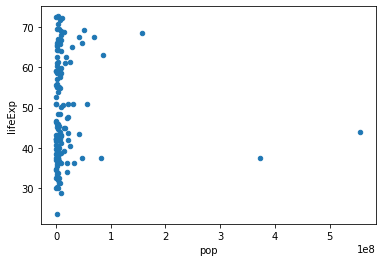

In [42]:
sorted_df.plot(x='pop',y='lifeExp',kind='scatter')

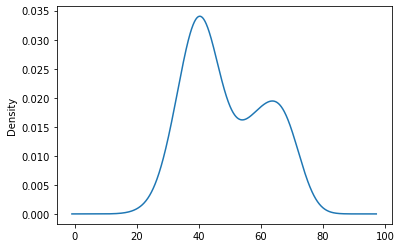

In [47]:
sorted_df['lifeExp'].plot(kind='kde')

In [57]:
#sorted_df.plot(y = 'lifeExp',kind='pie')

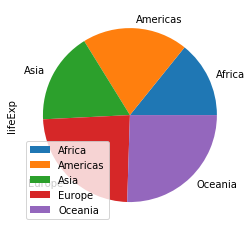

In [56]:
sorted_df.groupby('continent').mean().plot(y = 'lifeExp',kind='pie')

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

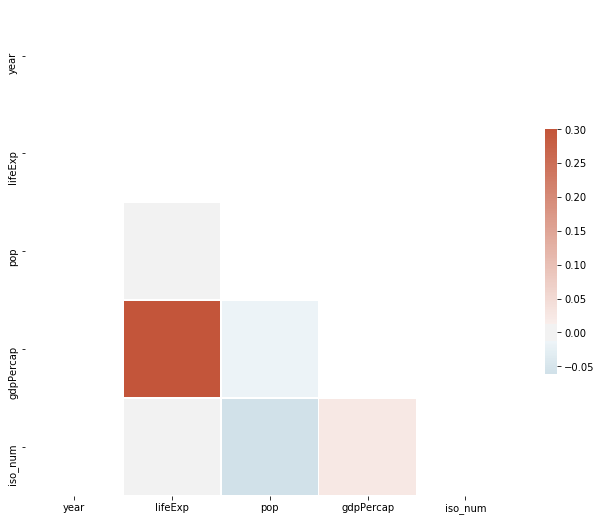

In [60]:
# Compute the correlation matrix
corr = sorted_df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

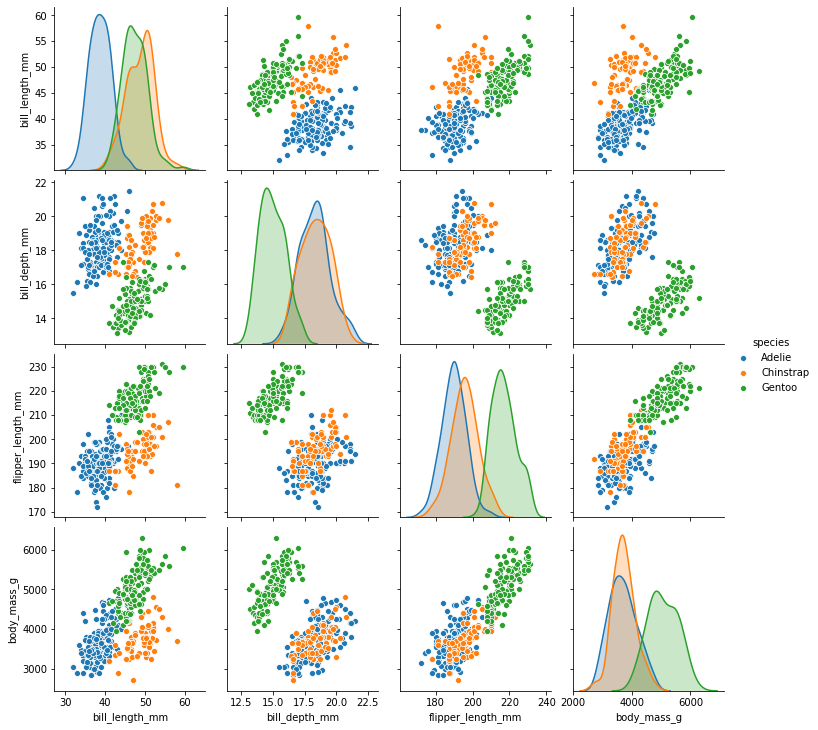

In [63]:
#sns.set_theme(style="ticks")

df = sns.load_dataset("penguins")
sns.pairplot(df, hue="species")

In [62]:
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.100,18.700,181.000,3750.000,MALE
1,Adelie,Torgersen,39.500,17.400,186.000,3800.000,FEMALE
2,Adelie,Torgersen,40.300,18.000,195.000,3250.000,FEMALE
3,Adelie,Torgersen,nan,nan,nan,nan,NaN
4,Adelie,Torgersen,36.700,19.300,193.000,3450.000,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,nan,nan,nan,nan,NaN
340,Gentoo,Biscoe,46.800,14.300,215.000,4850.000,FEMALE
341,Gentoo,Biscoe,50.400,15.700,222.000,5750.000,MALE
342,Gentoo,Biscoe,45.200,14.800,212.000,5200.000,FEMALE


/Users/csstnns/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/csstnns/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/csstnns/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/csstnns/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/csstnns/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


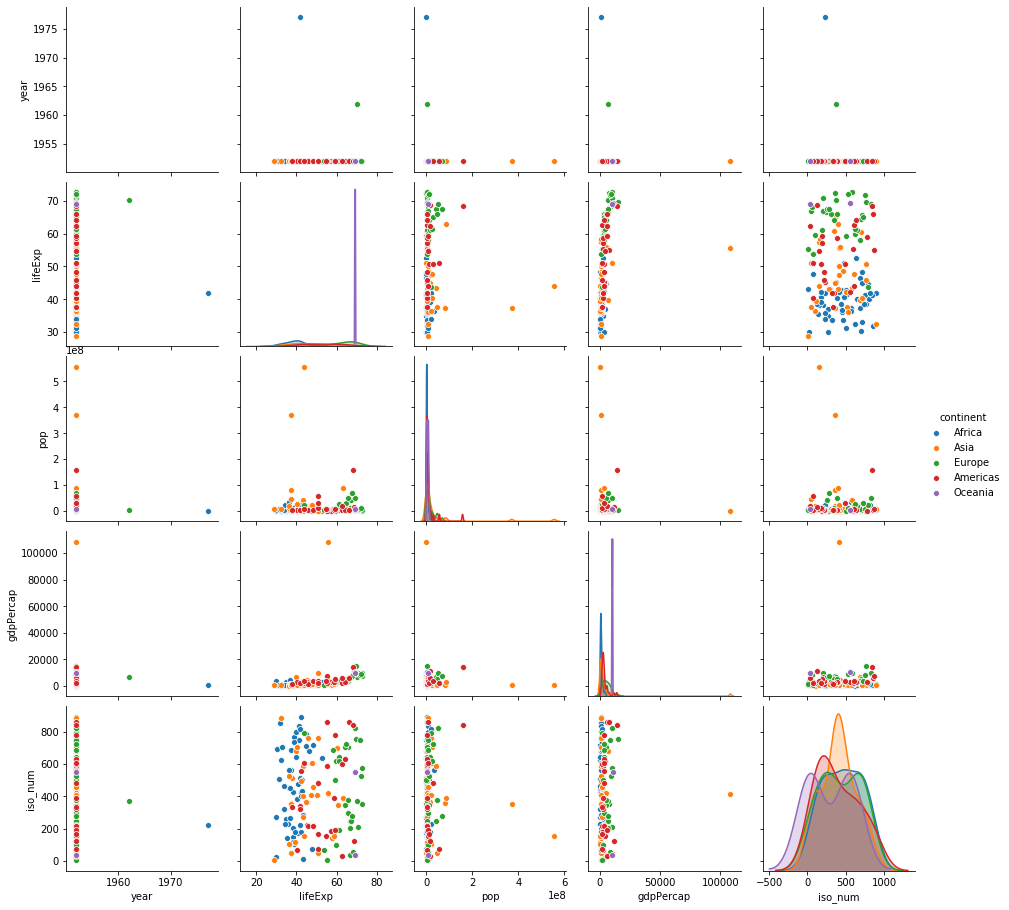

In [65]:
df = country_info.sort_values(by=['pop']).drop_duplicates(subset=['country'])
sns.pairplot(df, hue="continent")